In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import random
from AG import *

In [3]:
def funcao1(x):
    return 2*x*x +5*x

In [4]:
def torneio(valor,i,check = 'max'):
    if(check == 'max'):
        return i  if(valor[i]>valor[i+1]) else i+1
    if(check == 'min'):
        return i  if(valor[i]<valor[i+1]) else i+1

In [7]:
def AG_real(samples,funcao,check = 'min'):

    # Geração de uma população aleatória
    população = np.random.uniform(-100,100,size = samples) 

    #Acaba quando sobrar apenas 1
    for k in range(100):

        #Valor da capacidade é definido pela funcao e pela população
        capacidade = funcao(população)
        print(np.mean(capacidade),np.min(capacidade),k)
        #Aleatorizamos as capacidades
        rang = np.arange(len(capacidade))
        np.random.shuffle(rang)
        capacidade = capacidade[rang]
        população = população[rang]

        #Fazemos o torneio para saber quem é o maior(menor) em pares
        resultado = [torneio(capacidade,i,check) for i in range(0,len(capacidade),2)]
        #Aqui geramos os Vencedores ou Progenitores
        vencedores = população[resultado]
        # Geramos os decendentes e esses decendentes serão a nova população

        descendentes = []
        for i in range(0,len(vencedores),2):
            lamb = funcao(vencedores[i])/(funcao(vencedores[i]) + funcao(vencedores[i+1]))
            descendentes.append(lamb*vencedores[i] + (1 - lamb)*vencedores[i+1])
        
        população[np.argsort(capacidade)[::-1]][:len(descendentes)] = descendentes
    return população

In [8]:
valor = AG_real(1024,funcao1,'min')

6694.188734288837 -3.124711087350153 0
1024 512
6694.188734288837 -3.124711087350153 1
1024 512
6694.188734288837 -3.124711087350153 2
1024 512
6694.188734288837 -3.124711087350153 3
1024 512
6694.188734288837 -3.124711087350153 4
1024 512
6694.188734288837 -3.124711087350153 5
1024 512
6694.188734288837 -3.124711087350153 6
1024 512
6694.188734288837 -3.124711087350153 7
1024 512
6694.188734288837 -3.124711087350153 8
1024 512
6694.188734288837 -3.124711087350153 9
1024 512
6694.188734288837 -3.124711087350153 10
1024 512
6694.188734288837 -3.124711087350153 11
1024 512
6694.188734288837 -3.124711087350153 12
1024 512
6694.188734288837 -3.124711087350153 13
1024 512
6694.188734288837 -3.124711087350153 14
1024 512
6694.188734288837 -3.124711087350153 15
1024 512
6694.188734288837 -3.124711087350153 16
1024 512
6694.188734288837 -3.124711087350153 17
1024 512
6694.188734288837 -3.124711087350153 18
1024 512
6694.188734288837 -3.124711087350153 19
1024 512
6694.188734288837 -3.124711087

In [197]:
erro = []
for i in range(0,100):
    lamb = i/100
    valor = np.array([AG_real(2048,lamb,funcao1,'min') for i in range(100)])
    erro.append([lamb,abs(np.mean(valor) - (-5/4))])
erro = np.array(erro)

In [15]:
menor_erro = erro.T[0][erro.T[1] == np.min(erro.T[1])][0]

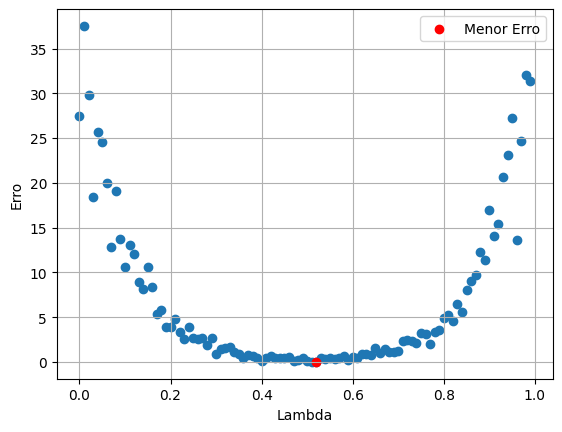

In [16]:
plt.scatter(erro.T[0],erro.T[1])
plt.grid()
plt.scatter(menor_erro,erro.T[1][erro.T[0] == menor_erro], c= 'red', label = 'Menor Erro')
plt.ylabel('Erro')
plt.xlabel('Lambda')
plt.legend()
plt.savefig('./erro_real.png')
plt.show()

In [5]:
def KPS(x,V,P):
    return np.dot(x,V),np.dot(x,P)

https://www.kaggle.com/datasets/binhthanhdang/dkpdataset?select=idkp1.txt

In [182]:
teste = np.loadtxt('./archive/idkp1.txt',dtype=str)
teste = [i.split(',') if(',' in i) else int(i) for i in teste]
Mochila = teste[0]
Peso = np.array(teste[1], dtype=int)
Valor = np.array(teste[2], dtype=int)

In [77]:
Mochila = 35
Peso = np.array([10,18,12,14,13,11,8,6])
Valor = np.array([5,8,7,6,9,5,4,3])

In [174]:
def AG_KPS(Valor,Peso,Mochila,tipo_geração,tipo_descendente,tipo_att):
    Q = []
    Tempo = []
    população = generate_população(Valor,Peso,Mochila,tipo_geração)
    for t in range(1000):
        Qualidade,Peso_Total = KPS(população,Valor,Peso)
        Q.append([np.mean(Qualidade),np.max(Qualidade)])
        Tempo.append(t)
        if(np.mean(Qualidade) == np.max(Qualidade)):
            return população[0],np.array(Q),np.array(Tempo)
        if(tipo_geração == 'aleatorio'):
            Penalidade = Valor/Peso

            Qualidade[Peso_Total > Mochila] = Qualidade[Peso_Total > Mochila] - Penalidade[Peso_Total > Mochila]*(Peso_Total[Peso_Total > Mochila] - Mochila)
        
        rang = np.arange(len(Qualidade))
        np.random.shuffle(rang)
        Qualidade = Qualidade[rang]
        população = população[rang]

        resultado = [torneio(Qualidade,i,'max') for i in range(0,len(Qualidade),2)]
        vencedores = população[resultado]
        
        descendentes = Cruzamento(vencedores,Valor,Peso, Mochila,tipo_descendente)
        população = Atualização(população,descendentes,Valor,Peso,Mochila,tipo_att)
    Qualidade,Peso_Total = KPS(população,Valor,Peso)

    return população[np.max(Qualidade) == Qualidade],np.array(Q),np.array(Tempo)

[1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1
 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1
 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0
 1 0 1 0]


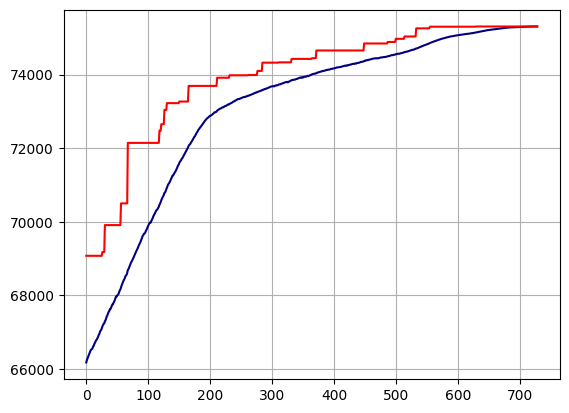

In [195]:
Solução,Q,Tempo = AG_KPS(Valor,Peso,Mochila,'baseado','probabilistico','incremental')
print(Solução)
plt.plot(Tempo,Q.T[0],c = 'navy',label = 'Média das Aptidões das Soluções')
plt.plot(Tempo,Q.T[1],c = 'red',label = 'Maior Aptidão das Soluções')
plt.grid()
plt.show()

In [193]:
KPS(Solução,Valor,Peso)

(75079, 61479)

In [194]:
KPSresposta(Valor, Peso, Mochila)

Objetivo:  78608.77273612842
Itens na mochila:  [1, 4, 6, 7, 9, 10, 11, 16, 19, 20, 22, 23, 25, 31, 32, 34, 37, 38, 43, 46, 47, 49, 51, 52, 53, 55, 56, 57, 58, 61, 62, 64, 65, 66, 67, 69, 70, 73, 76, 77, 82, 85, 88, 89, 91, 93, 94, 95, 97, 98, 99, 100, 101, 103, 106, 107, 109, 110, 115, 116, 118, 119, 121, 124, 127, 128, 130, 131, 133, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 151, 152, 153, 154, 160, 161, 163, 166, 167, 168, 169, 170, 171, 172, 175, 178, 181, 182, 184, 185, 186, 187, 188, 193, 199, 200, 205, 208, 211, 214, 215, 217, 220, 221, 222, 223, 226, 228, 229, 230, 231, 232, 233, 235, 236, 238, 239, 241, 244, 247, 248, 250, 253, 256, 257, 259, 262, 265, 266, 271, 274, 275, 277, 280, 281, 282, 283, 284, 286, 287, 288, 292, 293, 295, 296, 297, 298, 299]


In [190]:
Solução

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [155]:
Q

array([[14.578125, 20.      ],
       [14.765625, 20.      ],
       [14.921875, 20.      ],
       [15.09375 , 20.      ],
       [15.1875  , 20.      ],
       [15.328125, 20.      ],
       [15.4375  , 20.      ],
       [15.5625  , 20.      ],
       [15.6875  , 20.      ],
       [15.8125  , 20.      ],
       [15.921875, 20.      ],
       [16.      , 20.      ],
       [16.109375, 20.      ],
       [16.21875 , 20.      ],
       [16.328125, 20.      ],
       [16.4375  , 20.      ],
       [16.546875, 20.      ],
       [16.65625 , 20.      ],
       [16.765625, 20.      ],
       [16.859375, 20.      ],
       [16.953125, 20.      ],
       [17.046875, 20.      ],
       [17.140625, 20.      ],
       [17.234375, 20.      ],
       [17.328125, 20.      ],
       [17.421875, 20.      ],
       [17.515625, 20.      ],
       [17.609375, 20.      ],
       [17.703125, 20.      ],
       [17.796875, 20.      ],
       [17.875   , 20.      ],
       [17.953125, 20.      ],
       [